In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Reading the dataset to python environment
data = pd.read_csv("/content/Country-data.csv")
data.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#info of the dataset
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [4]:
#checking for null values in the data set
data.isnull().sum() 

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
#These three values are given as % of of gdp lets convert that to normal value
data['imports']=round((data.imports*data.gdpp)/100)
data['health']=round((data.health*data.gdpp)/100)
data['exports']=round((data.exports*data.gdpp)/100)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,1681.0,1283.0,7582.0,1610,9.44,56.2,5.82,553
1,Albania,16.6,1915347.0,448305.0,3325538.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,3407440.0,370002.0,2784824.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2740162.0,125844.0,1886573.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,82621084.0,10954624.0,106956424.0,19100,1.44,76.8,2.13,12200


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Applying standard scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data.iloc[:,1:])

In [14]:
from sklearn.cluster import KMeans
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,init="k-means++",random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)
print(inertia)

[1502.9999999999995, 1063.5216152978333, 642.3935389342341, 430.6888998279287, 351.4345810807525, 291.220102004132, 245.29486644826068, 216.43109065093333, 192.50516120255418, 170.0177572352317]


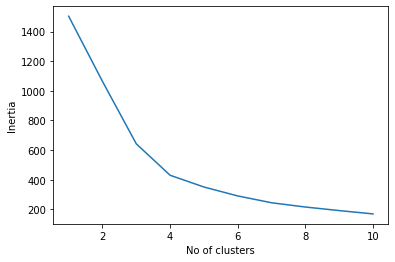

In [15]:
plt.plot(ks,inertia)
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(scaled_data)
km=model_kmeans.predict(scaled_data)
print(model_kmeans.labels_)

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1]


In [18]:
data['KMean_ClusterID']= pd.Series(km)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_ClusterID
0,Afghanistan,90.2,1681.0,1283.0,7582.0,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1915347.0,448305.0,3325538.0,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,3407440.0,370002.0,2784824.0,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2740162.0,125844.0,1886573.0,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,82621084.0,10954624.0,106956424.0,19100,1.44,76.8,2.13,12200,0


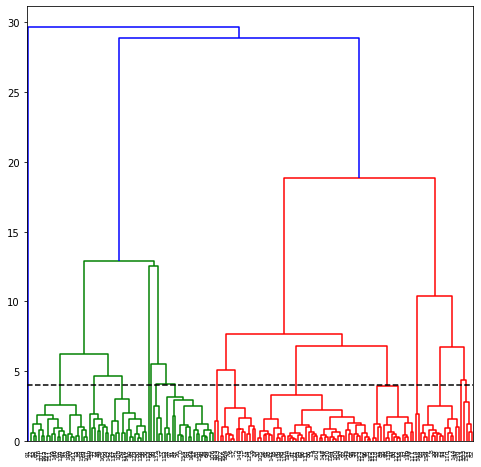

In [34]:
#clustering
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize = (8,8))
dendro = linkage(scaled_data,method = 'ward')
dendrogram(dendro, leaf_rotation = 90, leaf_font_size = 6)
plt.hlines(4,0,27000,colors="black",linestyles="dashed")
plt.show()

In [22]:
model_kmeans = KMeans(n_clusters=3,max_iter=50,random_state = 50)
model_kmeans.fit(scaled_data)
labels_sc = model_kmeans.predict(scaled_data)

In [24]:
data['ClusterID']= pd.Series(labels_sc)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_ClusterID,ClusterID
0,Afghanistan,90.2,1681.0,1283.0,7582.0,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,1915347.0,448305.0,3325538.0,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,3407440.0,370002.0,2784824.0,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2740162.0,125844.0,1886573.0,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,82621084.0,10954624.0,106956424.0,19100,1.44,76.8,2.13,12200,0,1


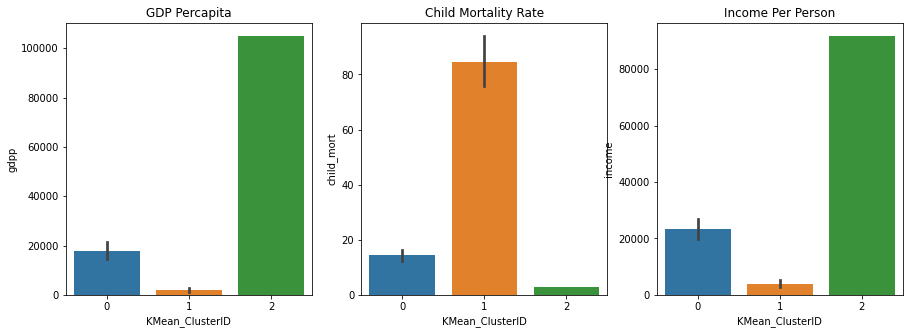

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x = 'KMean_ClusterID', y = 'gdpp', data= data)
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'KMean_ClusterID', y = 'child_mort', data= data)
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'KMean_ClusterID', y = 'income', data= data)
plt.title('Income Per Person')
plt.show()

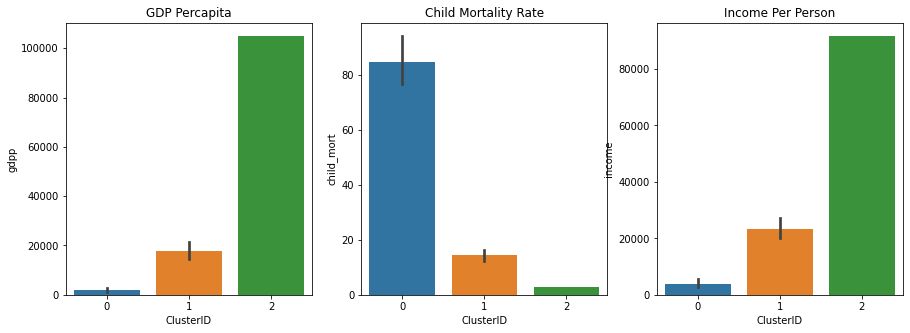

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x = 'ClusterID', y = 'gdpp', data= data)
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'ClusterID', y = 'child_mort', data= data)
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'ClusterID', y = 'income', data= data)
plt.title('Income Per Person')
plt.show()

In [33]:
Underdeveloped_cluster = data[data['ClusterID']== 1]
Underdevelopedcountry  = Underdeveloped_cluster.sort_values(by = ['gdpp','income','child_mort'],ascending=[True, True, False])
Underdevelopedcountry['country'].values

array(['Bangladesh', 'Kyrgyz Republic', 'Vietnam', 'Uzbekistan',
       'Moldova', 'Bolivia', 'Philippines', 'Bhutan', 'Egypt',
       'Sri Lanka', 'Morocco', 'Guatemala', 'Georgia', 'Ukraine',
       'El Salvador', 'Guyana', 'Indonesia', 'Armenia', 'Paraguay',
       'Cape Verde', 'Samoa', 'Tonga', 'Fiji', 'Jordan', 'Albania',
       'Tunisia', 'Belize', 'Algeria', 'Macedonia, FYR', 'China',
       'Bosnia and Herzegovina', 'Ecuador', 'Jamaica', 'Peru', 'Thailand',
       'Serbia', 'Dominican Republic', 'Azerbaijan', 'Belarus',
       'St. Vincent and the Grenadines', 'Colombia', 'Iran', 'Montenegro',
       'Bulgaria', 'Maldives', 'Grenada', 'Mauritius', 'Panama',
       'Costa Rica', 'Romania', 'Suriname', 'Lebanon', 'Kazakhstan',
       'Malaysia', 'Argentina', 'Turkey', 'Russia', 'Seychelles',
       'Brazil', 'Latvia', 'Uruguay', 'Lithuania', 'Libya',
       'Antigua and Barbuda', 'Poland', 'Chile', 'Hungary', 'Venezuela',
       'Croatia', 'Estonia', 'Barbados', 'Slovak Republic

these countries need the aid.